In [3]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
os.listdir()

['.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '01 Super Mart Case Study Data.xlsx',
 '0330 KNN and Classification End Objectives.ipynb',
 '3D Objects',
 'adults.csv',
 'Advertising.csv',
 'AMDRM_Install.log',
 'anaconda3',
 'AppData',
 'Application Data',
 'automl.ipynb',
 'bank_data.csv',
 'bmw_prices.csv',
 'configuration-Office2019Enterprise.xml',
 'configuration-Office2021Enterprise.xml',
 'configuration-Office365-x64.xml',
 'configuration-Office365-x86.xml',
 'Contacts',
 'Cookies',
 'Data Set',
 'Dataset (5).csv',
 'Documents',
 'Downloads',
 'fake_job_postings.csv',
 'Favorites',
 'Iris.csv',
 'Lecture 06 (1).ipynb',
 'Links',
 'Loan interest rate   (1).ipynb',
 'Loan interest rate prediction  (1).ipynb',
 'Loan interest rate prediction .ipynb',
 'Local Settings',
 'Machine Learning Project.ipynb',
 'Machine Learning.ipynb',
 'MELBOURNE_HOUSE_PRICES_LESS.csv',
 'Mobile Data.csv',
 'Music',
 'My Documents',
 'Naive Bayes 

# Loading the dataset

In [5]:
df=pd.read_csv('Dataset (5).csv')

In [6]:
df.shape

(164309, 14)

In [7]:
df.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]).round(0)

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.0,139207.0,164309.0,164309.0,75930.0,164309.0,164309.0,164309.0
mean,10082155.0,73331.0,17.0,1.0,34.0,11.0,25.0,2.0
std,47432.0,60377.0,8.0,1.0,22.0,5.0,12.0,1.0
min,10000001.0,4000.0,0.0,0.0,0.0,0.0,2.0,1.0
1%,10001644.0,19000.0,2.0,0.0,1.0,3.0,6.0,1.0
5%,10008216.0,28000.0,5.0,0.0,5.0,5.0,9.0,1.0
25%,10041078.0,45000.0,11.0,0.0,16.0,8.0,17.0,2.0
50%,10082155.0,63000.0,17.0,0.0,31.0,10.0,23.0,2.0
75%,10123232.0,88698.0,23.0,1.0,50.0,14.0,32.0,3.0
95%,10156094.0,150000.0,31.0,3.0,74.0,20.0,47.0,3.0


In [8]:
k=df.isnull().sum()

In [9]:
[(k[i]/164309).round(2) for i in range(0,14)]

[0.0, 0.0, 0.04, 0.15, 0.15, 0.0, 0.0, 0.0, 0.0, 0.54, 0.0, 0.0, 0.0, 0.0]

In [10]:
k

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [11]:
for o in df.columns:
    print(o,'------',round((df[o].nunique()/df.shape[0])*100,3))

Loan_ID ------ 100.0
Loan_Amount_Requested ------ 0.785
Length_Employed ------ 0.007
Home_Owner ------ 0.003
Annual_Income ------ 7.489
Income_Verified ------ 0.002
Purpose_Of_Loan ------ 0.009
Debt_To_Income ------ 2.406
Inquiries_Last_6Mo ------ 0.005
Months_Since_Deliquency ------ 0.074
Number_Open_Accounts ------ 0.035
Total_Accounts ------ 0.061
Gender ------ 0.001
Interest_Rate ------ 0.002


In [12]:
df['Loan_Amount_Requested']

0          7,000
1         30,000
2         24,725
3         16,000
4         17,000
           ...  
164304    20,725
164305     6,000
164306    20,250
164307    10,000
164308     9,250
Name: Loan_Amount_Requested, Length: 164309, dtype: object

# Preprocessing the data

In [13]:
#finding the null values
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [14]:
#filling the null values with the mean for --->numerical
df['Annual_Income']=df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Months_Since_Deliquency']=df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [16]:
df['Length_Employed']=df['Length_Employed'].map({'< 1 year':1,'1 years':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11})

In [17]:
#filling null values with mode for ---->categorical
df['Home_Owner']=df['Home_Owner'].fillna(df['Home_Owner'].mode()[0])
df['Length_Employed']=df['Length_Employed'].fillna(df['Length_Employed'].mean())

In [18]:
df['Length_Employed']=df['Length_Employed'].astype(int)

In [19]:
df['Income_Verified']=df['Income_Verified'].str.replace('VERIFIED - income source','VERIFIED - income')

In [20]:
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].str.replace(',',"")
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].astype(int)

#### EXPLORATORY DATA ANALYSIS--->categorical

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

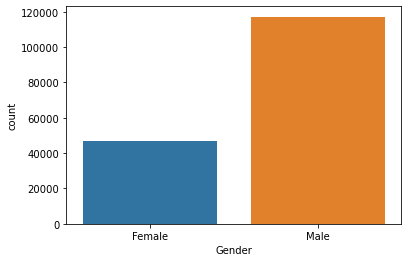

In [21]:
sns.countplot(df['Gender'])
#male applicants are large in number

In [22]:
pd.crosstab(df['Gender'],df['Interest_Rate'])

Interest_Rate,1,2,3
Gender,,,
Female,9669,20415,17049
Male,24137,50165,42874


C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


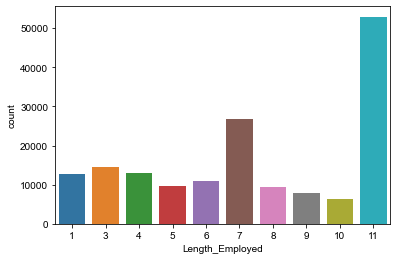

In [23]:
sns.countplot(df['Length_Employed'])
sns.set(rc={"figure.figsize":(16, 8)})
#most of the applicants have taken duration above 10 years
#32% of the customers are opting for the repayment period above 10 years
#16% of the customers are opting for the repayment period of 8 years
#43% of the customers above 10 years are assinged 2%interest rate
#37% of the customers are assigned 3% interest rate

In [24]:
dfl=df[df['Length_Employed']==11]
dfl2=df[df['Length_Employed']==7]
k_len=dfl.append(dfl2)
k_len.shape

(79802, 14)

In [25]:
k_len['Interest_Rate'].value_counts(normalize=True)

2    0.425666
3    0.372597
1    0.201737
Name: Interest_Rate, dtype: float64

In [26]:
k_len['Loan_Amount_Requested'].value_counts()

10000    5617
12000    4205
20000    4187
15000    4185
35000    3231
         ... 
31775       1
30475       1
27625       1
1050        1
33325       1
Name: Loan_Amount_Requested, Length: 1238, dtype: int64

In [27]:
k_len['Purpose_Of_Loan'].value_counts()

debt_consolidation    47616
credit_card           17839
home_improvement       4873
other                  4034
major_purchase         1458
small_business          998
car                     794
medical                 731
vacation                413
moving                  357
house                   328
wedding                 279
renewable_energy         53
educational              29
Name: Purpose_Of_Loan, dtype: int64

In [28]:
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [29]:
Total=(df['Debt_To_Income']*(df['Annual_Income']/12)).round(0)

In [30]:
df['Total_debts']=Total

In [31]:
t_debl=df[df['Total_debts']>100000]

In [32]:
t_debl['Interest_Rate']
#69211 people are greater than 100000 debt
#for total debt greater than 100000 ,41% of customers are alloted 2% interest rate and 39% are alloted 3% intrest rate

0         1
4         1
9         1
10        2
12        2
         ..
164302    2
164303    3
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 69211, dtype: int64

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

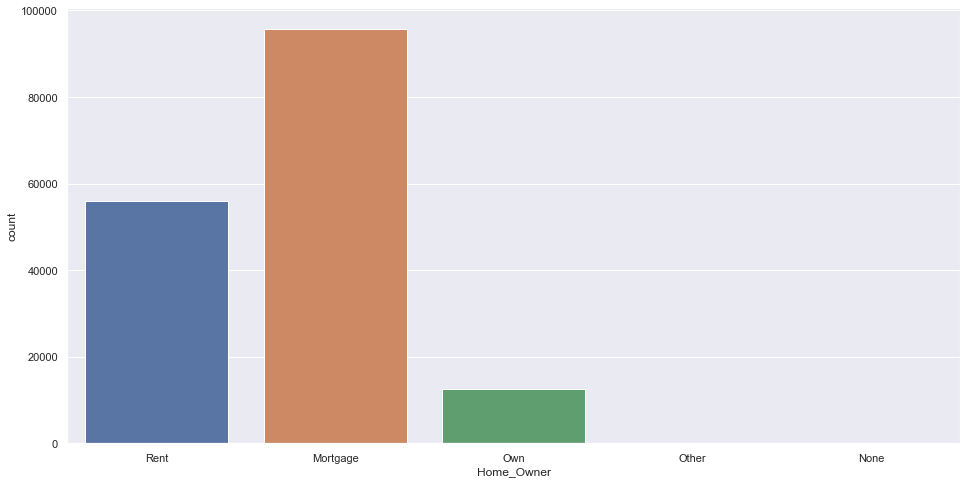

In [33]:
sns.countplot(df['Home_Owner'])
#applicants with ownership as mortgage is high

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Verified', ylabel='count'>

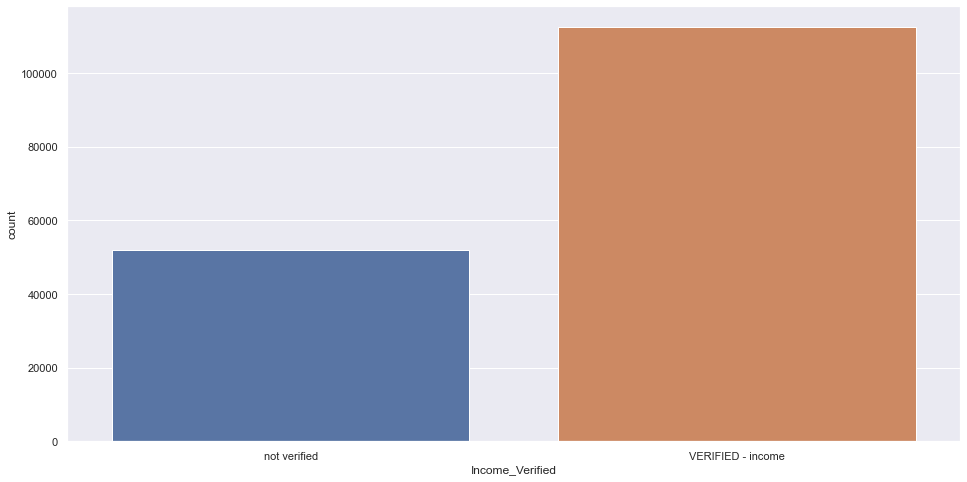

In [34]:
sns.countplot(df['Income_Verified'])

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


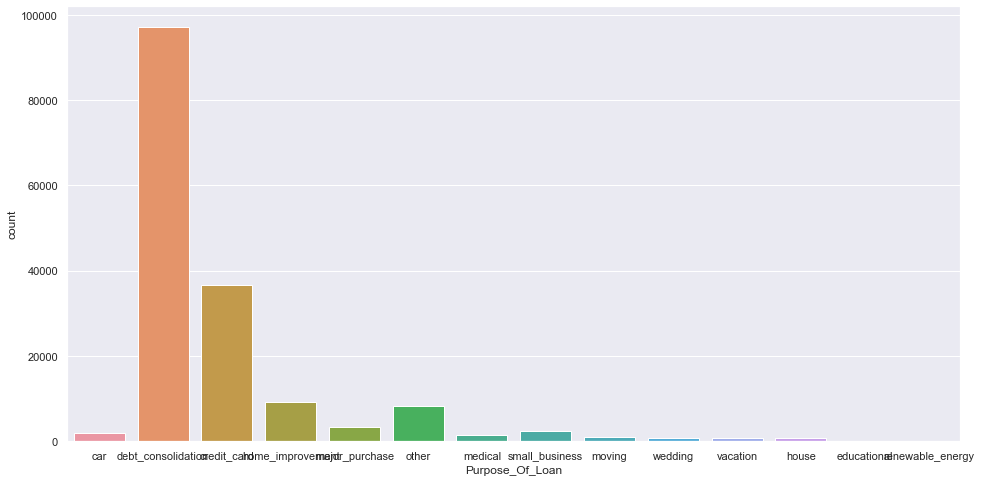

In [35]:
sns.countplot(df['Purpose_Of_Loan'])
sns.set(rc={"figure.figsize":(16, 8)})
#debt consolidation is popular reason for taking loan

([<matplotlib.patches.Wedge at 0x1ef218d16a0>,
 [Text(-0.4277288057504124, 1.0134338008628516, 'debt_consolidation'),
  Text(-0.030495125596785917, -1.0995772129845345, 'credit_card'),
  Text(0.864834670705776, -0.6797506839608418, 'home_improvement'),
  Text(1.0479916129885576, -0.3342358136191295, 'other'),
  Text(1.097329427865964, -0.07660369925373141, 'major_purchase')],
 [Text(-0.23330662131840674, 0.552782073197919, '62.71%'),
  Text(-0.016633704870974136, -0.5997693889006551, '23.69%'),
  Text(0.4717280022031505, -0.3707731003422773, '5.99%'),
  Text(0.5716317889028496, -0.18231044379225245, '5.39%'),
  Text(0.5985433242905258, -0.041783835956580764, '2.22%')])

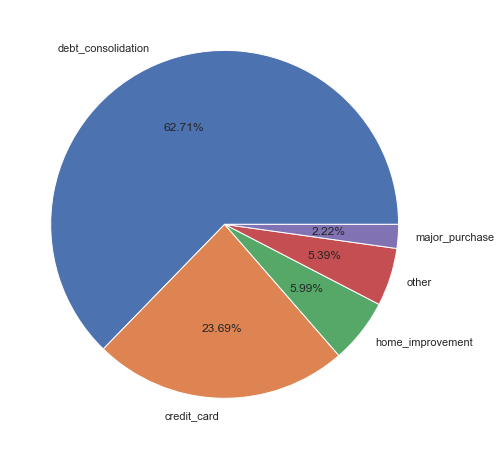

In [36]:
k=df['Purpose_Of_Loan'].value_counts()
plt.pie(k[:5],labels=['debt_consolidation','credit_card','home_improvement','other','major_purchase'],autopct='%1.2f%%')

In [37]:
k[:5]

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
Name: Purpose_Of_Loan, dtype: int64

#### EXPLORATORY DATA ANALYSIS--->numerical

In [38]:
df['Annual_Income']=np.log(df['Annual_Income'])
#apply log transformation to the attribute

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


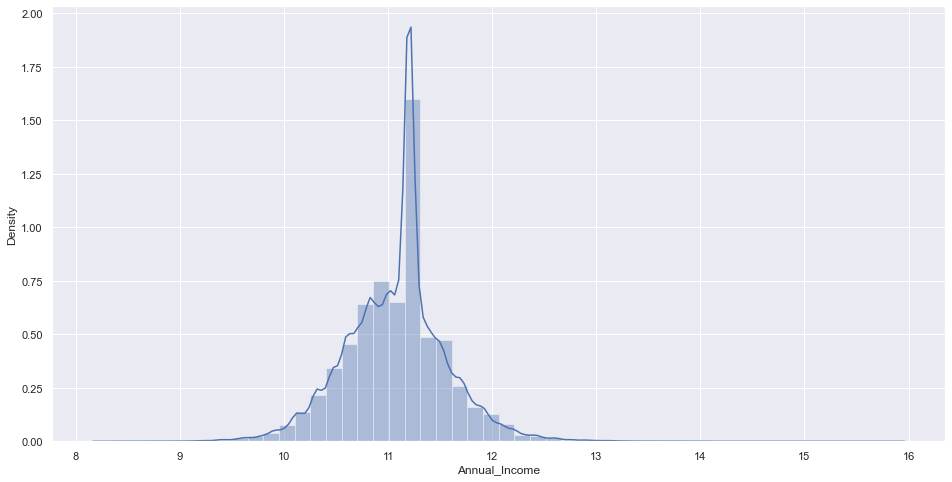

In [39]:
sns.distplot(df['Annual_Income'])
sns.set(rc={"figure.figsize":(8, 8)})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int32  
 2   Length_Employed          164309 non-null  int32  
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
 14  Tota

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Count'>

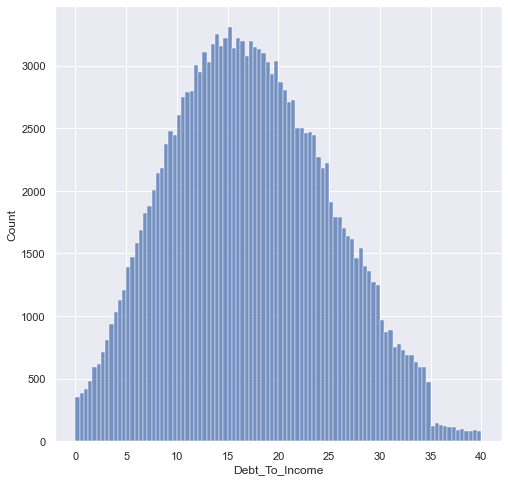

In [41]:
sns.histplot(df['Debt_To_Income'])

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Count'>

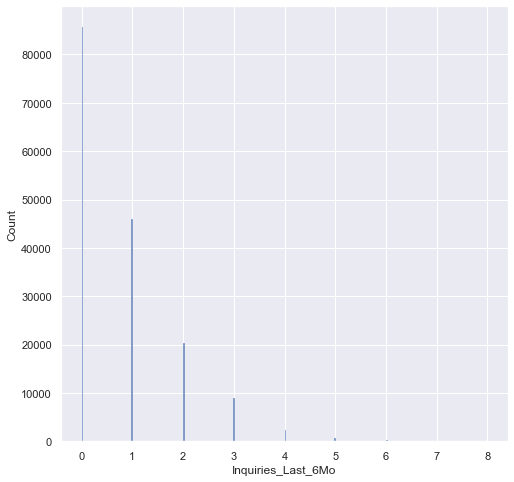

In [42]:
sns.histplot(df['Inquiries_Last_6Mo'])

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months_Since_Deliquency', ylabel='Density'>

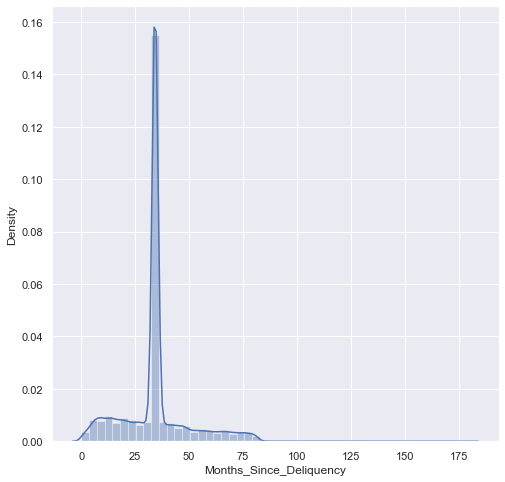

In [43]:
sns.distplot(df['Months_Since_Deliquency'])

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Count'>

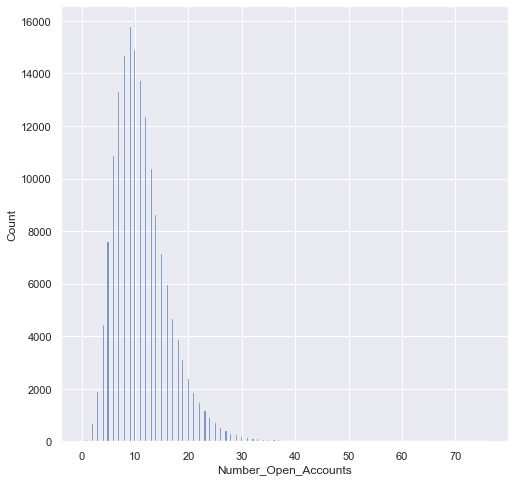

In [44]:
sns.histplot((df['Number_Open_Accounts']))

In [45]:
from sklearn import preprocessing
import numpy as np
x_array = df['Total_Accounts']
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.00125073 0.0021441  0.0014294  ... 0.00268013 0.00553893 0.00080404]]


C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Accounts', ylabel='Number_Open_Accounts'>

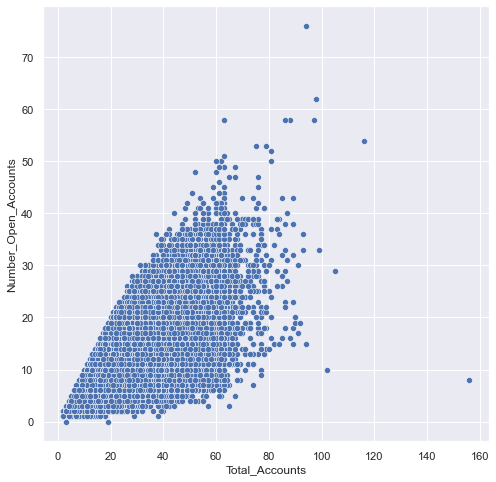

In [46]:
sns.scatterplot(df['Total_Accounts'],df['Number_Open_Accounts'])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

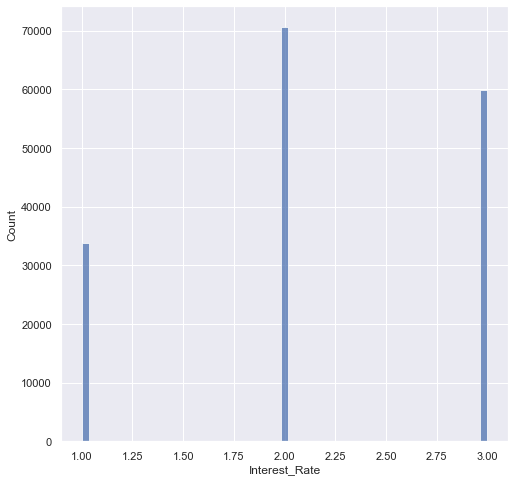

In [47]:
sns.histplot(df['Interest_Rate'])

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate', ylabel='Number_Open_Accounts'>

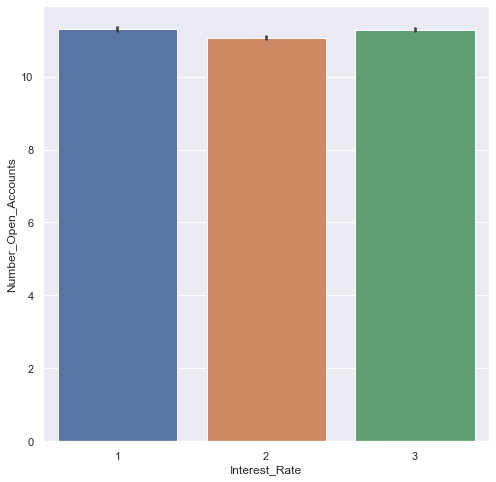

In [48]:
sns.barplot(df['Interest_Rate'],df['Number_Open_Accounts'])

In [49]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Total_debts
0,10000001,7000,1,Rent,11.127263,not verified,car,18.37,0,34.229356,9,14,Female,1,104097.0
1,10000002,30000,5,Mortgage,11.202741,VERIFIED - income,debt_consolidation,14.93,0,17.000000,12,24,Female,3,91236.0
2,10000003,24725,8,Mortgage,11.232767,VERIFIED - income,debt_consolidation,15.88,0,34.229356,12,16,Male,3,100000.0
3,10000004,16000,1,Mortgage,10.935960,VERIFIED - income,debt_consolidation,14.34,3,34.229356,16,22,Male,3,67111.0
4,10000005,17000,9,Own,11.472103,VERIFIED - income,debt_consolidation,22.17,1,34.229356,19,30,Female,1,177360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,11,Rent,11.202741,VERIFIED - income,credit_card,13.56,0,34.229356,13,16,Male,2,82864.0
164305,10164306,6000,9,Own,11.202741,VERIFIED - income,small_business,9.12,0,36.000000,13,30,Male,2,55732.0
164306,10164307,20250,11,Mortgage,11.202741,VERIFIED - income,credit_card,18.17,1,34.229356,17,30,Male,1,111036.0
164307,10164308,10000,5,Rent,11.202741,not verified,major_purchase,18.75,1,48.000000,16,62,Female,3,114580.0


C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Interest_Rate,1,2,3
Income_Verified,,,
VERIFIED - income,18940,45583,47913
not verified,14866,24997,12010


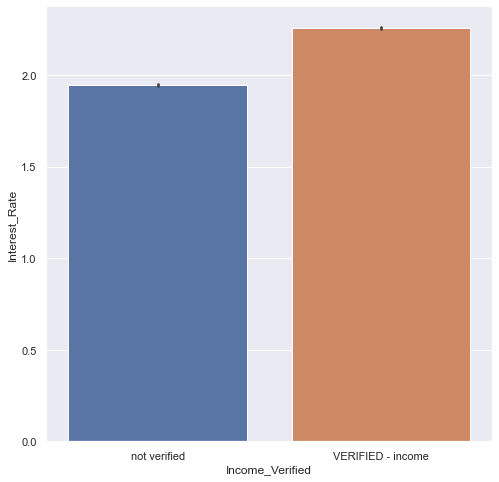

In [50]:
sns.barplot(df['Income_Verified'],df['Interest_Rate'])
pd.crosstab(df['Income_Verified'],df['Interest_Rate'])
#customers whose income source is verified are getting high interest rate comparitively the one's whose income source is not verified

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home_Owner', ylabel='Interest_Rate'>

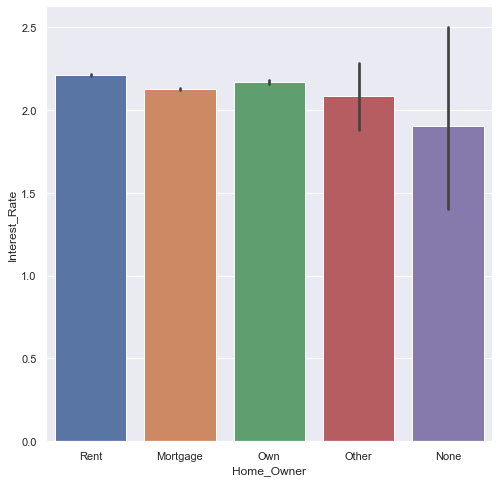

In [51]:
sns.barplot(df['Home_Owner'],df['Interest_Rate'])
#rented people are alloted more interest rate

C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length_Employed', ylabel='Interest_Rate'>

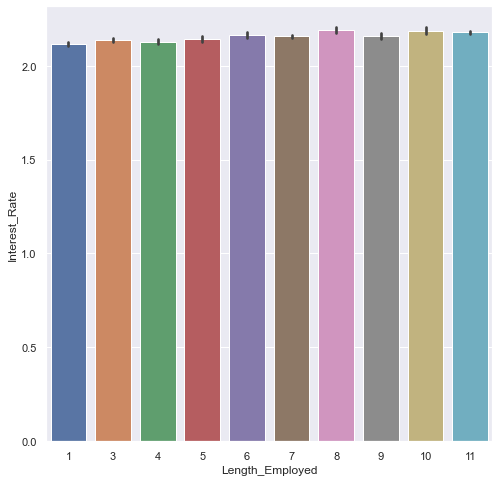

In [52]:
sns.barplot(df['Length_Employed'],df['Interest_Rate'])

# working with unsorted variables

In [53]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [54]:
df['Purpose_Of_Loan']=df['Purpose_Of_Loan'].map({'debt_consolidation':1,'credit_card':2,'home_improvement':3,'other':4,'major_purchase':5,'small_business':6,'car':7,'medical':8,'moving':9,'vacation':10,'wedding':11,'house':12,'renewable_energy':13,'educational':14})

In [55]:
df['Home_Owner']=df['Home_Owner'].fillna(df['Home_Owner'].mode()[0])

In [56]:
#removing other,none as there are only 59 entities
df=df[df['Home_Owner']!='Other']
df=df[df['Home_Owner']!='None']

In [57]:
#converting  house_owner 3 class into two and performing feature engineering
h_own=pd.get_dummies(df['Home_Owner'],drop_first=True)
df=pd.concat([df,h_own],axis=1)
df.drop(['Home_Owner'],axis=1,inplace=True)

In [58]:
df['Income_Verified']=df['Income_Verified'].replace('VERIFIED - income',1)
df['Income_Verified']=df['Income_Verified'].replace('not verified',0)

<AxesSubplot:xlabel='Months_Since_Deliquency'>

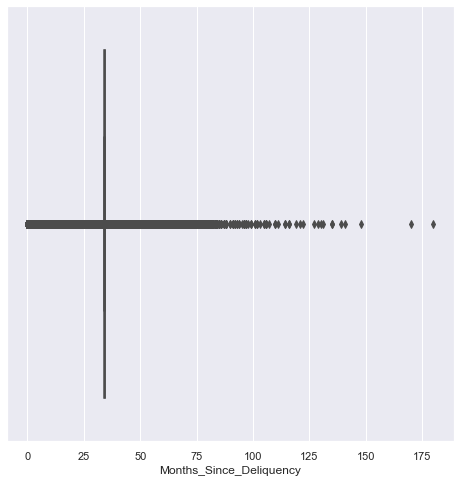

In [59]:
### performing capping and flooring to the outliers present
sns.boxplot(data=df,x='Months_Since_Deliquency')

In [60]:
df['Months_Since_Deliquency']=np.where(df['Months_Since_Deliquency']>79 ,79 , df['Months_Since_Deliquency'])

In [61]:
df['Debt_To_Income']=np.where(df['Debt_To_Income']>34.67 ,34.67 , df['Debt_To_Income'])

In [62]:
df['Inquiries_Last_6Mo']=np.where(df['Inquiries_Last_6Mo']>4 ,4 , df['Inquiries_Last_6Mo'])

In [63]:
df['Total_Accounts']=np.where(df['Total_Accounts']>59 ,59 , df['Total_Accounts'])

In [64]:
df['Number_Open_Accounts']=np.where(df['Number_Open_Accounts']>27 ,27 , df['Number_Open_Accounts'])


In [65]:
pd.crosstab(df['Number_Open_Accounts'],df['Interest_Rate'])

Interest_Rate,1,2,3
Number_Open_Accounts,,,
0,0,0,2
1,3,9,19
2,105,275,268
3,292,814,783
4,850,1972,1603
5,1482,3362,2738
6,2314,4741,3777
7,2718,5887,4686
8,2965,6513,5190


In [66]:
pd.crosstab(df['Income_Verified'],df['Interest_Rate'])

Interest_Rate,1,2,3
Income_Verified,,,
0,14853,24983,12003
1,18938,45571,47902


C:\Users\kaush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Inquiries_Last_6Mo'>

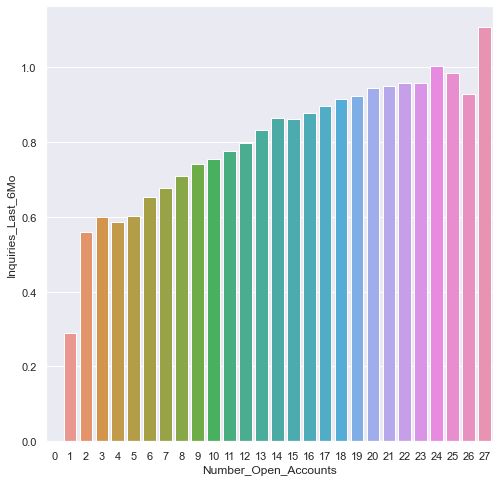

In [67]:
sns.barplot(df['Number_Open_Accounts'],df['Inquiries_Last_6Mo'],ci=None)
#customers with more number of accounts have went through more inquriries

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Total_debts,Own,Rent
count,1.642500e+05,164250.000000,164250.000000,164250.000000,164250.00000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,164250.000000,1.642500e+05,164250.000000,164250.000000
mean,1.008216e+07,14350.742770,7.311062,11.079962,0.68439,1.993120,17.187676,0.772335,34.205777,11.157132,25.015154,0.713163,2.158989,9.935360e+04,0.076256,0.341132
std,4.743245e+04,8282.210993,3.300402,0.481315,0.46476,1.893946,7.795197,0.997915,14.704633,4.837039,11.395247,0.452286,0.738358,6.217514e+04,0.265408,0.474091
min,1.000000e+07,500.000000,1.000000,8.294050,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1.004108e+07,8000.000000,5.000000,10.791379,0.00000,1.000000,11.370000,0.000000,34.000000,8.000000,17.000000,0.000000,2.000000,5.660225e+04,0.000000,0.000000
50%,1.008216e+07,12075.000000,7.000000,11.156251,1.00000,1.000000,16.840000,0.000000,34.229356,10.000000,23.000000,1.000000,2.000000,8.900000e+04,0.000000,0.000000
75%,1.012323e+07,20000.000000,11.000000,11.314475,1.00000,2.000000,22.780000,1.000000,34.229356,14.000000,32.000000,1.000000,3.000000,1.299300e+05,0.000000,1.000000
max,1.016431e+07,35000.000000,11.000000,15.830414,1.00000,14.000000,34.670000,4.000000,79.000000,27.000000,59.000000,1.000000,3.000000,2.395125e+06,1.000000,1.000000


# coorelation Matrix

<AxesSubplot:>

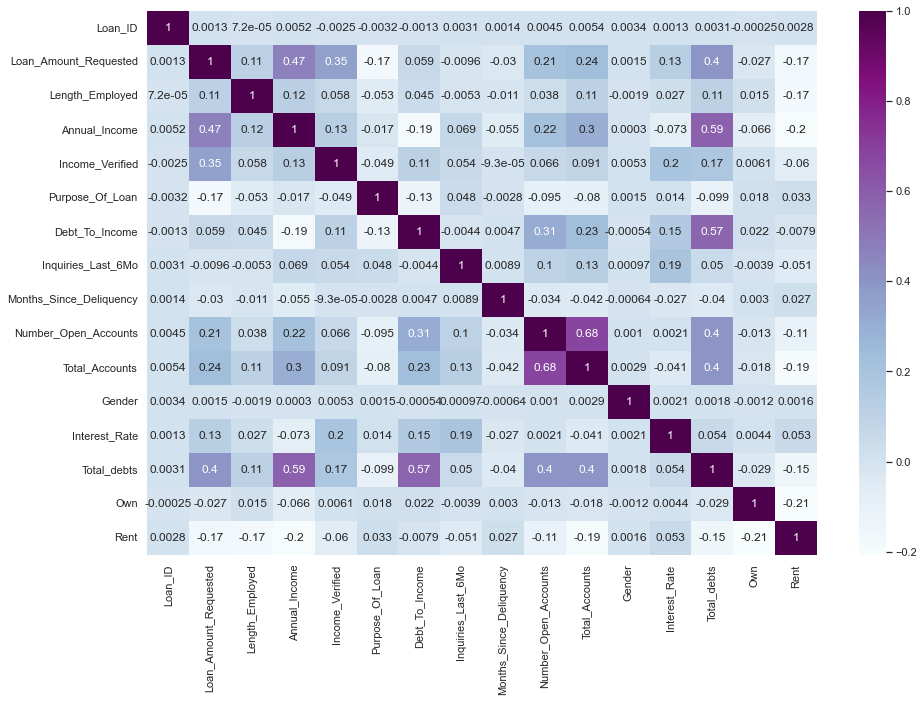

In [68]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap='BuPu')

# model building

In [69]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [70]:
X=df.loc[:,['Gender','Income_Verified','Loan_Amount_Requested','Debt_To_Income','Inquiries_Last_6Mo']]
y=df['Interest_Rate']

In [71]:
X

,Gender,Income_Verified,Loan_Amount_Requested,Debt_To_Income,Inquiries_Last_6Mo
0,0,0,7000,18.37,0
1,0,1,30000,14.93,0
2,1,1,24725,15.88,0
3,1,1,16000,14.34,3
4,0,1,17000,22.17,1
...,...,...,...,...,...
164304,1,1,20725,13.56,0
164305,1,1,6000,9.12,0
164306,1,1,20250,18.17,1
164307,0,0,10000,18.75,1


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [75]:
loan_pred=tree.DecisionTreeClassifier(random_state = 2)
loan_pred.fit(X_train,y_train)
score= accuracy_score(y_train,y_train_predicted)

In [76]:
score

0.9642413566366581

In [74]:
#Train_data
y_train_predicted =loan_pred.predict(X_train)
print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

           1       0.91      0.99      0.95     25391
           2       0.96      0.97      0.97     53035
           3       1.00      0.94      0.97     44761

    accuracy                           0.96    123187
   macro avg       0.96      0.97      0.96    123187
weighted avg       0.97      0.96      0.96    123187



In [81]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(X_train,y_train)
    print('accuracy is',model.score(X_test,y_test)*100)
    #cross validation
    score = cross_val_score(model,X,y,cv=5)
    print('cross_validation is',np.mean(score)*100)

In [82]:
#test data
y_test_predicted = loan_pred.predict(X_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           1       0.86      0.82      0.84      6830
           2       0.77      0.84      0.80      6700
           3       0.85      0.81      0.83      6745

    accuracy                           0.82     20275
   macro avg       0.82      0.82      0.82     20275
weighted avg       0.82      0.82      0.82     20275



In [83]:
classify(loan_pred,X,y)

accuracy is 40.52066337091786
cross_validation is 40.51019786910198


#### Creating a User Defined function to compare model performance on Train and Test samples

In [84]:
def compare_train_test(model):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    cr_train = classification_report(y_train,y_train_predicted)
    cr_test = classification_report(y_test,y_test_predicted)
    print(round(model.score(X_train,y_train)*100,2),cr_train,'\n',round(model.score(X_test,y_test)*100,2),cr_test)

In [85]:
compare_train_test(loan_pred)

82.28               precision    recall  f1-score   support

           1       0.86      0.81      0.83     26961
           2       0.77      0.84      0.81     27091
           3       0.84      0.82      0.83     27046

    accuracy                           0.82     81098
   macro avg       0.82      0.82      0.82     81098
weighted avg       0.82      0.82      0.82     81098
 
 82.24               precision    recall  f1-score   support

           1       0.86      0.82      0.84      6830
           2       0.77      0.84      0.80      6700
           3       0.85      0.81      0.83      6745

    accuracy                           0.82     20275
   macro avg       0.82      0.82      0.82     20275
weighted avg       0.82      0.82      0.82     20275



# pruning

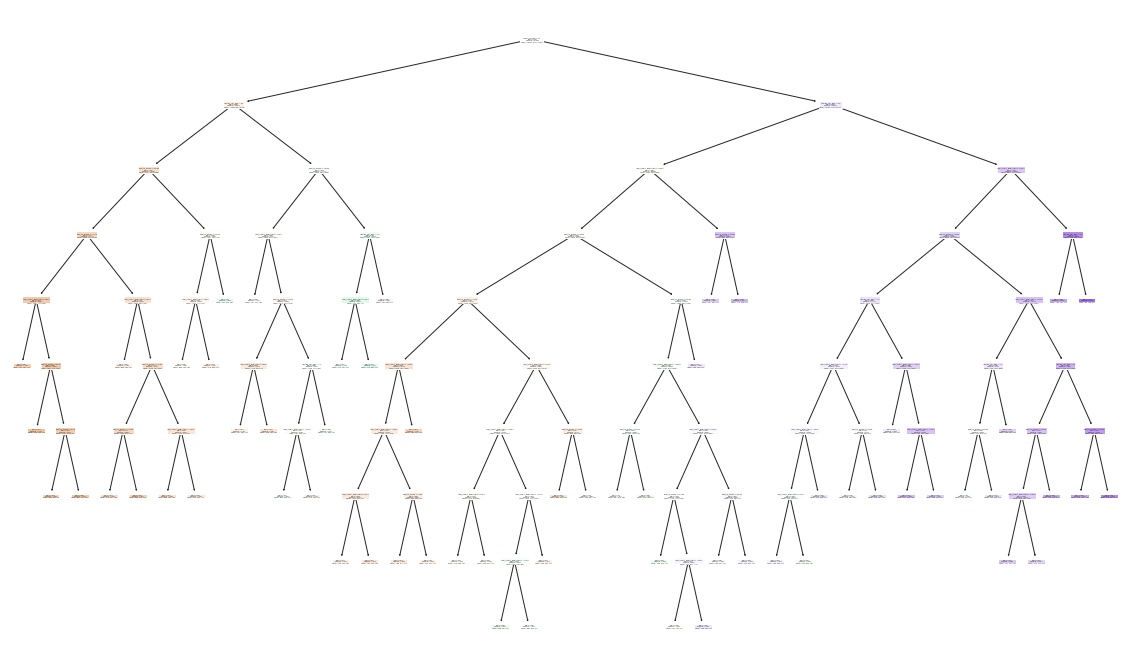

In [86]:
response_model_pruned = tree.DecisionTreeClassifier(random_state = 1,min_samples_leaf=1000)
response_model_pruned.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_pruned, filled=True,feature_names = X_train.columns);
plt.show()

In [87]:
compare_train_test(response_model_pruned)

46.45               precision    recall  f1-score   support

           1       0.47      0.56      0.52     26961
           2       0.39      0.25      0.30     27091
           3       0.50      0.58      0.54     27046

    accuracy                           0.46     81098
   macro avg       0.45      0.46      0.45     81098
weighted avg       0.45      0.46      0.45     81098
 
 46.09               precision    recall  f1-score   support

           1       0.48      0.56      0.52      6830
           2       0.37      0.24      0.29      6700
           3       0.49      0.57      0.53      6745

    accuracy                           0.46     20275
   macro avg       0.45      0.46      0.45     20275
weighted avg       0.45      0.46      0.45     20275



In [88]:
score = cross_val_score(response_model_pruned,X_train,y_train,cv=5)
np.mean(score*100)

45.82727728944961

### grid search cv for hypertuning parameters

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
variable_options = {'max_depth':range(4,9), 'min_samples_leaf':[20,30,40,50,75,100], 'criterion':['gini','entropy']}
variable_options

{'max_depth': range(4, 9),
 'min_samples_leaf': [20, 30, 40, 50, 75, 100],
 'criterion': ['gini', 'entropy']}

In [79]:
response_model_new = tree.DecisionTreeClassifier(random_state = 2)
gs = GridSearchCV(response_model_new,variable_options,cv=5,scoring='precision')
gs.fit(X_train,y_train)
gs.best_params_

C:\Users\kaush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kaush\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\kaush\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1656, in precision_score
    p, _, _, _ = p

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20}

#### using under sampling

In [89]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
resampled_X, resampled_y = rus.fit_resample(X, y)
from collections import Counter
Counter(resampled_y)
from collections import Counter
Counter(resampled_y)
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=True)
compare_train_test(loan_pred)

82.26               precision    recall  f1-score   support

           1       0.85      0.81      0.83     26961
           2       0.77      0.84      0.80     27091
           3       0.85      0.81      0.83     27046

    accuracy                           0.82     81098
   macro avg       0.82      0.82      0.82     81098
weighted avg       0.82      0.82      0.82     81098
 
 81.88               precision    recall  f1-score   support

           1       0.85      0.82      0.84      6830
           2       0.77      0.83      0.80      6700
           3       0.84      0.81      0.83      6745

    accuracy                           0.82     20275
   macro avg       0.82      0.82      0.82     20275
weighted avg       0.82      0.82      0.82     20275



In [90]:
score = cross_val_score(loan_pred,resampled_X,resampled_y,cv=5)

In [91]:
print('cross_validation is',np.mean(score)*100)

cross_validation is 39.02815204813658


#### using over sampling for class imbalance

In [108]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
resampled_X, resampled_y = ros.fit_resample(X, y)
from collections import Counter
Counter(resampled_y)
from collections import Counter
Counter(resampled_y)
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)
compare_train_test(loan_pred)

84.35               precision    recall  f1-score   support

           1       0.87      0.83      0.85     56493
           2       0.80      0.86      0.83     56544
           3       0.87      0.83      0.85     56292

    accuracy                           0.84    169329
   macro avg       0.85      0.84      0.84    169329
weighted avg       0.85      0.84      0.84    169329
 
 73.92               precision    recall  f1-score   support

           1       0.79      0.75      0.77     14061
           2       0.68      0.74      0.71     14010
           3       0.76      0.73      0.74     14262

    accuracy                           0.74     42333
   macro avg       0.74      0.74      0.74     42333
weighted avg       0.74      0.74      0.74     42333



In [93]:
score = cross_val_score(loan_pred,resampled_X,resampled_y,cv=10)

In [94]:
print('cross_validation is',np.mean(score)*100)

cross_validation is 61.78062392020999


# using smote for class imbalance

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
sm = SMOTE(sampling_strategy='minority')

In [97]:
X_smote,y_smote = sm.fit_resample(X,y)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.20,random_state=42,stratify=y_smote)

In [99]:
X_train.shape

(160810, 5)

In [100]:
X_test.shape

(40203, 5)

In [101]:
response_model_smote = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf=20)
response_model_smote.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=2)

In [102]:
compare_train_test(response_model_smote)

57.08               precision    recall  f1-score   support

           1       0.59      0.69      0.63     56443
           2       0.53      0.50      0.52     56443
           3       0.59      0.51      0.55     47924

    accuracy                           0.57    160810
   macro avg       0.57      0.57      0.57    160810
weighted avg       0.57      0.57      0.57    160810
 
 46.85               precision    recall  f1-score   support

           1       0.51      0.59      0.55     14111
           2       0.40      0.38      0.39     14111
           3       0.49      0.43      0.46     11981

    accuracy                           0.47     40203
   macro avg       0.47      0.47      0.47     40203
weighted avg       0.47      0.47      0.47     40203



In [103]:
scor = cross_val_score(loan_pred,X_smote,y_smote,cv=5)

In [104]:
print('cross_validation is',np.mean(scor)*100)

cross_validation is 44.871247178343154


In [105]:
X_smote.shape

(201013, 5)

In [106]:
y_smote.shape

(201013,)

In [121]:
X_train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Own,Rent
59230,10059251,6000,9.000000,10.819778,1,1,27.510000,0,2.000000,7,15,1,2,0,1
20034,10020044,16000,7.348378,11.326596,0,1,20.910000,0,40.000000,11,33,0,2,0,1
5500,10005502,21850,3.000000,10.819778,1,1,15.940000,1,34.229356,11,23,1,3,0,0
65335,10065361,31175,11.000000,11.170435,1,1,19.430000,0,34.229356,20,59,1,3,0,0
167454,10029321,12783,10.663971,11.010345,1,1,16.490665,0,34.229356,9,24,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,10052623,7200,4.000000,11.283512,0,1,2.950000,2,26.000000,3,11,1,2,0,0
14333,10014342,9950,5.000000,11.202741,0,1,18.160000,0,34.229356,14,24,0,2,0,1
63992,10064017,26300,3.000000,11.512925,1,1,15.040000,0,26.000000,9,21,1,3,0,0
64766,10064791,5000,4.000000,10.768485,0,1,22.810000,1,34.229356,15,24,1,2,0,1


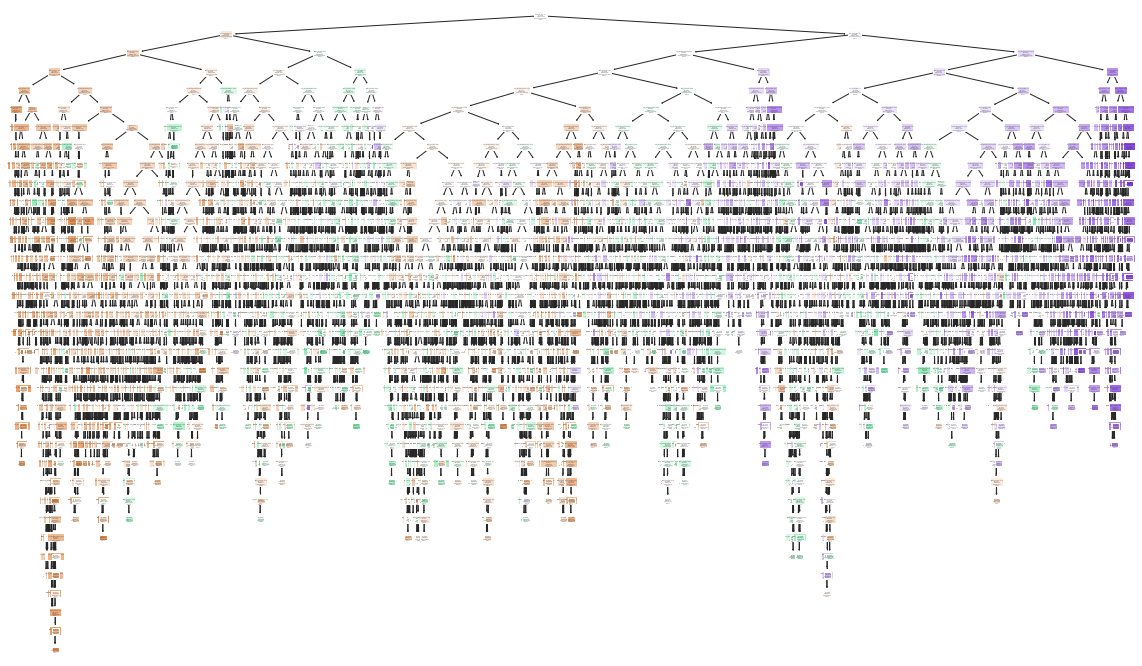

In [107]:
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_smote, filled=True,feature_names = X_smote.columns,class_names=['1','2','3']);
plt.show()

In [31]:
ln=df[df['Total_debts']>100000]

In [36]:
ln[ln['Loan_Amount_Requested']>30000]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Total_debts
15,10000016,35000,5,Rent,101000.000000,VERIFIED - income,credit_card,15.24,0,34.229356,10,17,Female,3,128270.0
44,10000045,30700,7,Mortgage,70000.000000,VERIFIED - income,debt_consolidation,33.86,0,34.229356,16,25,Female,3,197517.0
49,10000050,31050,7,Mortgage,70000.000000,VERIFIED - income,credit_card,20.42,0,3.000000,10,26,Female,3,119117.0
83,10000084,35000,6,Mortgage,200000.000000,not verified,credit_card,15.19,2,64.000000,12,38,Male,1,253167.0
90,10000091,35000,11,Mortgage,98000.000000,VERIFIED - income,major_purchase,14.74,2,13.000000,24,37,Male,2,120377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164115,10164116,35000,1,Mortgage,122000.000000,VERIFIED - income,debt_consolidation,22.48,0,77.000000,13,73,Male,3,228547.0
164194,10164195,35000,11,Mortgage,73331.159434,VERIFIED - income,credit_card,17.80,0,17.000000,11,28,Male,3,108775.0
164205,10164206,32000,11,Mortgage,112000.000000,VERIFIED - income,home_improvement,11.06,0,15.000000,21,30,Male,1,103227.0
164284,10164285,35000,11,Rent,100904.000000,VERIFIED - income,debt_consolidation,22.84,2,34.229356,14,35,Male,3,192054.0


In [38]:
df['Months_Since_Deliquency'].value_counts()

34.229356     88379
9.000000       1518
10.000000      1510
14.000000      1487
12.000000      1484
              ...  
180.000000        1
139.000000        1
131.000000        1
170.000000        1
98.000000         1
Name: Months_Since_Deliquency, Length: 123, dtype: int64